# Simple NN Recurrent Neural Network

## The idea

We have a certain phenomena that we want to model/predict with data, but we don't see much of a pattern from one day to the next. For example, a stock exchange where the stock is relatively volatile from day to day, but in the long run we see a clear pattern.

For this it would clearly be useful to input a number of data points from earlier times. In our stock example this would mean inputting the stock from the last 5 trading days rather than just the last one.

From our previous efforts, we know that we could plug those inputs into a neural network, train it and look at what comes out. But neural networks are not magic or infallible, and can soemtimes train towards the wrong patterns, or take a very long time to train a relatively good model. We know instictively that not all of these data points are equal; the days closer to the date we want to predict will be more indicative of what the value may be. So we want to make it easy for the network and set it up so that it prioritises these values intuitively and doesn't have to work out that they're useful.

From our previous efforts with very simple networks, we know that we could do this by creating a neural net with 5 inputs and initialising the weights so that the later dates have a higher impact (so that gradient descent finds the local minima around there) . This has a few disadvantages, for one, the static structure of the network would always require the same number of inputs to work. so if we had stock data for 5 days in one case and 10 for another, then we would not be able to train the network properly on the first case (as we didn't have enough days of data) and we would be unable to use all of the available information in the second case.
it would also be very hard to manage initial weighting with more complex neural networks with lots of layers and nodes, where the later layers can become organised in a way that is very hard for humans to understand. 

Instead, we'll introduce another approach which avoids these problems, a recurrent neural network (RNN). It's not as scary as it sounds, and not as complicated either. It essentially runs each day's input through a neural network, and then adds it as an input to the next one with a scaling weight (that we look to optimise.)


## The Network Architecture



Your typical graph of an RNN will look like this:

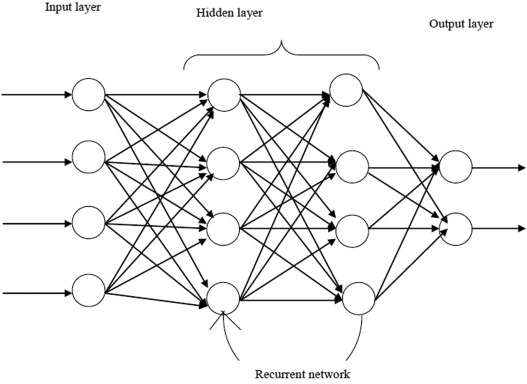 

credit: Balachandra Kumaraswamy, in Artificial Intelligence in Data Mining, 2021, chap 6.2.5

This looks scary, so I'll give you a simpler version of the same thing:

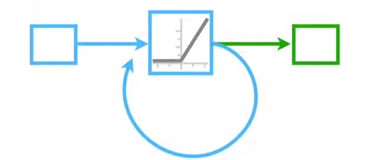

You can See how the arrow that circles back around the activation function represents the recurring action of the network. To me, this still isn't immediately intuitive, so I prefer to use this trick from Josh Starmer at StatQuest (youtube) where we unroll the network to get the following:

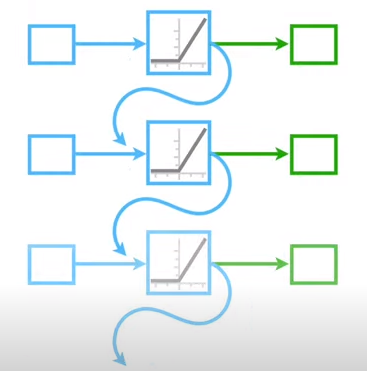

Now this makes a bit more sense. We'll go through the steps for this picture.

1) We run input 1 through a mini neural net ("mini net 1") (where input 1 is the one furthest back in time \[or the one assumed least important for our model\])
2) We save the output from input 1 and also pass down the output from the hidden layer to our next mini net (mini net 2)
3) We run input 2 through mini net 2. Mini net 2 will take the output from mini net 1 into account and then save it's own output and also pass it down to mini net 3.
4) this process is continued until we get a final output which takes all of the inputs into account.

In practice, we will store an array of the outputs at each time step which can be used for backpropagation, model evaluation and evasion of the vanishing gradient problem.

(Pictures from StatQuest, youtube, Recurrent Neural Networks (RNNs) Clearly Explained!!!: https://www.youtube.com/watch?v=AsNTP8Kwu80)

### More standard graphical representation

Rather than the "left to right" graphs that we have made so far, for networks with recurrence we use a vertical graphing style, with the inputs at the bottom and the outputs at the top.

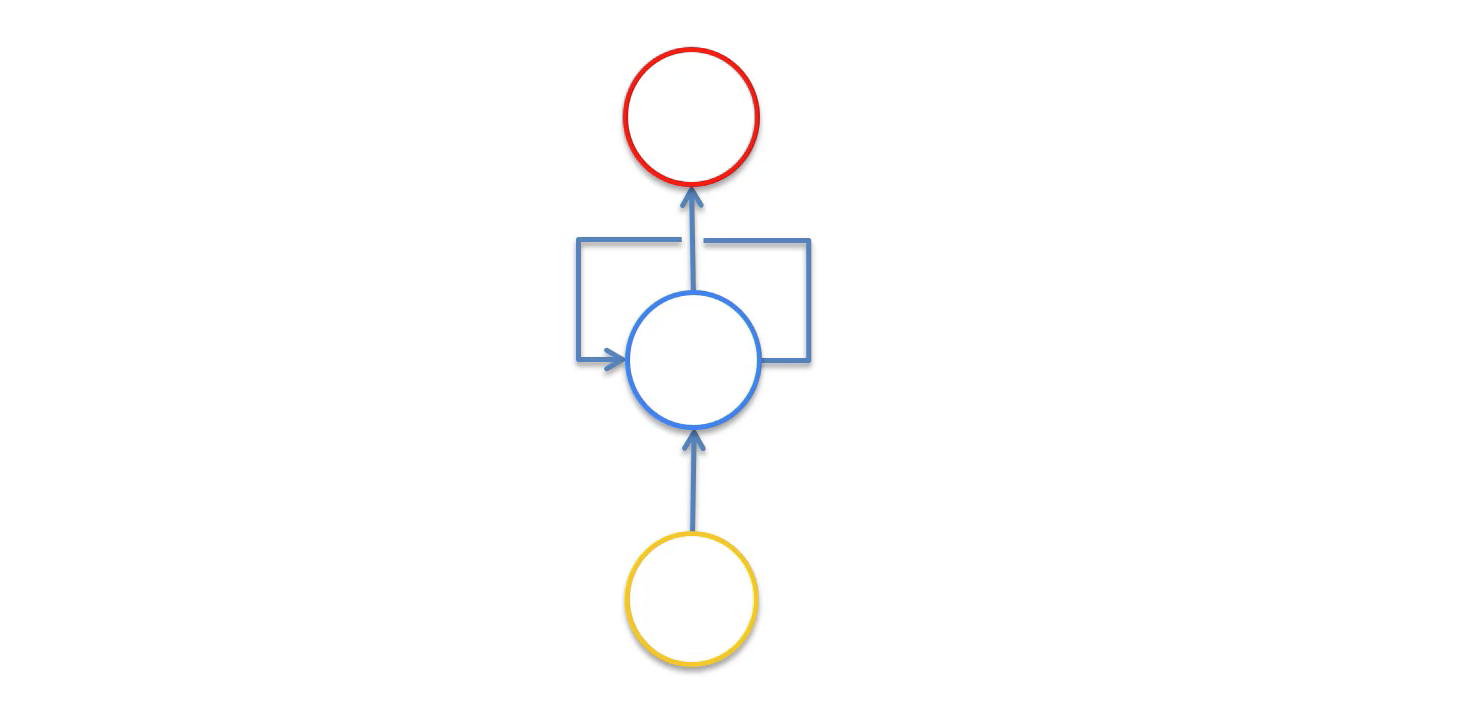

credit: https://www.freecodecamp.org/news/the-ultimate-guide-to-recurrent-neural-networks-in-python/

This graph is basically a rotated version of our first Statquest recursion graph. We have the input in yellow, the hidden layers and the recusive arrow in blue, and the output in red. This is essentially the representation of a general RNN, the blue circle can be as big of a layer as we want. If you feel that you would like more convincing of this, there is a good explanation in the article by freecodecamp.org here:  https://www.freecodecamp.org/news/the-ultimate-guide-to-recurrent-neural-networks-in-python/


## An implementation

### The vanishing gradient problem

One of the biggest problems with classical RNNs is dubbed the vanishing gradient problem. This is when 

credit: https://www.freecodecamp.org/news/the-ultimate-guide-to-recurrent-neural-networks-in-python/
